<a href="https://colab.research.google.com/github/vitoriasgomes/Aulas/blob/master/Atividade_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
import io
import gzip

In [3]:
url = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"

request = Request(url, headers={"User-Agent": "python-urllib"})
response = urlopen(request)
data = gzip.decompress(response.read()).decode("utf-8")
df = pd.read_csv(io.StringIO(data))

In [4]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [5]:
estado = 'PR'
estado_df = df[(df['state'] == estado)].copy()

In [6]:
estado_df['date'] = pd.to_datetime(estado_df.date)

In [7]:
estado_index = pd.DatetimeIndex(estado_df.date.values)
estado_df.set_index(estado_index, inplace=True)

In [8]:
estado_df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
2020-03-12,Cianorte,4105508.0,2020-03-12,11,82620.0,False,False,1,1.21036,2020-03-12,0.0,0,1,city,PR,1,0
2020-03-12,Curitiba,4106902.0,2020-03-12,11,1933105.0,False,False,5,0.25865,2020-03-12,0.0,0,1,city,PR,5,0
2020-03-12,NaN,41.0,2020-03-12,11,11433957.0,False,False,6,0.05248,2020-03-12,0.0,0,1,state,PR,6,0
2020-03-13,Cianorte,4105508.0,2020-03-13,11,82620.0,False,False,1,1.21036,2020-03-13,0.0,0,2,city,PR,0,0
2020-03-13,Curitiba,4106902.0,2020-03-13,11,1933105.0,False,False,5,0.25865,2020-03-13,0.0,0,2,city,PR,0,0


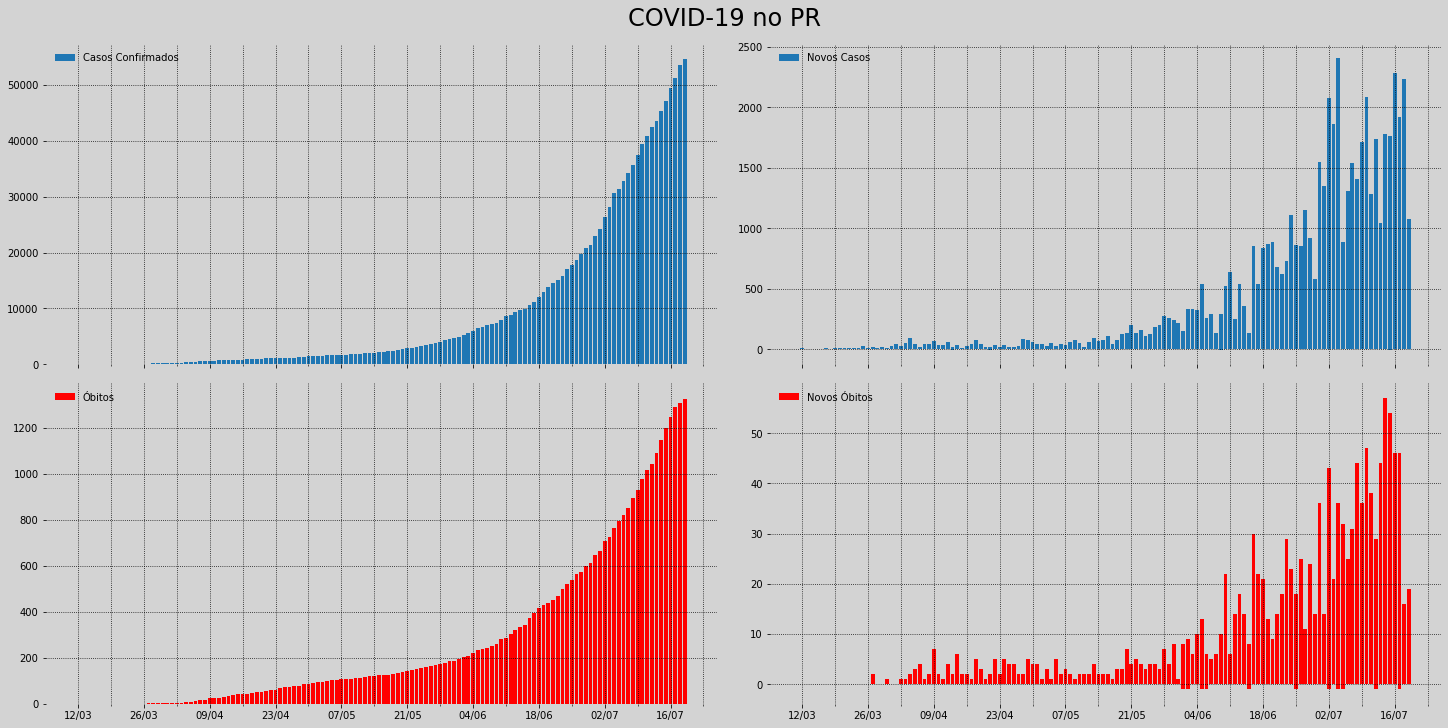

In [9]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='lightgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 no "+estado, fontsize=24)
x = estado_df.index.strftime("%d/%m")
axs[0, 0].bar(x, estado_df.last_available_confirmed, label = 'Casos Confirmados')
axs[0, 1].bar(x, estado_df.new_confirmed, label = 'Novos Casos')
axs[1, 0].bar(x, estado_df.last_available_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(x, estado_df.new_deaths, label = 'Novos Óbitos', color = 'red')

for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

#plt.tight_layout()

In [10]:
copia_df = df.copy()

In [12]:
copia_df['date'] = pd.to_datetime(copia_df.date)

In [13]:
copia_index = pd.DatetimeIndex(copia_df.date.values)
copia_df.set_index(copia_index, inplace=True)

In [14]:
copia_df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
2020-02-25,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
2020-02-25,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2020-02-26,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
2020-02-26,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
2020-02-27,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='lightgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 no Brasil", fontsize=24)
x = copia_df.index.strftime("%d/%m")
axs[0, 0].bar(x, copia_df.last_available_confirmed, label = 'Casos Confirmados')
axs[0, 1].bar(x, copia_df.new_confirmed, label = 'Novos Casos')
axs[1, 0].bar(x, copia_df.last_available_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(x, copia_df.new_deaths, label = 'Novos Óbitos', color = 'red')

for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

#plt.tight_layout()